# Introduction to data in R (in python)
### Python setup

In [574]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import *
%matplotlib inline
sns.set() #Making seaborn the default styling 
#data_path = '/Users/User/Desktop/Data/Datasets/Learning'
data_path = '/Users/User/Desktop/Data/DataCamp-master/Intro_to_data'
os.chdir(data_path)
os.listdir()

['.DS_Store',
 'all_polls.RData',
 'disc_big.rds',
 'disc_new.rds',
 'disc_small.rds']

In [488]:
email50 = pd.read_csv("email50.csv")
email50.head(1)

,Unnamed: 0,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,0,1,0,1,2012-01-04 14:19:16,0,0,0,...,0,0,21.705,551,1,1,0,0,8,small


### Filtering based on a factor 
Create a new dataset called email50_big that is a subset of the original email50 dataset containing only emails with "big" numbers. This information is stored in the number variable.

In [489]:
email50_big = email50[email50["number"] == "big"]
pd.value_counts(email50_big["number"])

big    7
Name: number, dtype: int64

### Discretizing a different variable
Create a categorical version of the num_char variable in the email50 dataset, which tells you the number of characters in an email, in thousands. This new variable will have two levels—"below median" and "at or above median"—depending on whether an email has less than the median number of characters or equal to or more than that value.

In [490]:
med_num_char = np.median(email50["num_char"])
email50["num_char_cat"] = np.where(email50['num_char'] <= med_num_char, "below_median",
                                   "equal_above_median")
email50[["num_char","num_char_cat"]].head()

,num_char,num_char_cat
0,21.705,equal_above_median
1,7.011,equal_above_median
2,0.631,below_median
3,2.454,below_median
4,41.623,equal_above_median


### Combining levels of a different factor
Create a new variable in email50 called number_yn that is "no" if there is no number in the email and "yes" if there is a small or a big number. 

In [491]:
email50["replaced_numbers"] = email50["number"].replace(to_replace = ["none","small","big"], value = ["no","yes","yes"])

# Observational studies and experiments 

In [493]:
gapminder = pd.read_csv("gapminder.csv")
gapminder.head()

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Number of males vs females admitted 

In [494]:
ucb = pd.read_csv("ucb_admit.csv")
ucb.drop(columns = ["Unnamed: 0"], inplace = True)
ucb.head()

,Admit,Gender,Dept
0,Admitted,Male,A
1,Admitted,Male,A
2,Admitted,Male,A
3,Admitted,Male,A
4,Admitted,Male,A


In [495]:
table_gender = ucb.groupby(by = ["Gender","Admit"]).count().unstack()
table_gender.columns = table_gender.columns.droplevel(level = 0)
table_gender

Admit,Admitted,Rejected
Gender,,
Female,557,1278
Male,1198,1493


### Proportion admitted overall per gender

In [496]:
table_gender['Perc_admitted'] = table_gender["Admitted"] / table_gender.agg(sum,1)
table_gender

Admit,Admitted,Rejected,Perc_admitted
Gender,,,
Female,557,1278,0.303542
Male,1198,1493,0.445188


### Proportion admitted for each department

In [497]:
#Adding a numerical column to allow the groupby to count the values
ucb["Count"] = 1
table_dept = ucb.groupby(by = ["Dept","Gender","Admit"]).count().unstack("Admit")

#Adding the percentage admitted column
table_dept["perc_admit_by_dept"] = table_dept[("Count","Admitted")] / table_dept.agg(sum,1)
table_dept

Count          perc_admit_by_dept
Admit       Admitted Rejected                   
Dept Gender                                     
A    Female       89       19           0.824074
     Male        512      313           0.620606
B    Female       17        8           0.680000
     Male        353      207           0.630357
C    Female      202      391           0.340641
     Male        120      205           0.369231
D    Female      131      244           0.349333
     Male        138      279           0.330935
E    Female       94      299           0.239186
     Male         53      138           0.277487
F    Female       24      317           0.070381
     Male         22      351           0.058981

In [498]:
table_dept = table_dept.unstack()
table_dept

Count                    perc_admit_by_dept          
Admit  Admitted      Rejected                                  
Gender   Female Male   Female Male             Female      Male
Dept                                                           
A            89  512       19  313           0.824074  0.620606
B            17  353        8  207           0.680000  0.630357
C           202  120      391  205           0.340641  0.369231
D           131  138      244  279           0.349333  0.330935
E            94   53      299  138           0.239186  0.277487
F            24   22      317  351           0.070381  0.058981

In [499]:
vals = table_dept.loc[(slice(None)),[("perc_admit_by_dept","","Male")]].values > table_dept.loc[(slice(None)),[("perc_admit_by_dept","","Female")]].values
table_dept.insert(loc = 6, column = "More males admitted?", value = vals, allow_duplicates=True)
table_dept

Count                    perc_admit_by_dept            \
Admit  Admitted      Rejected                                     
Gender   Female Male   Female Male             Female      Male   
Dept                                                              
A            89  512       19  313           0.824074  0.620606   
B            17  353        8  207           0.680000  0.630357   
C           202  120      391  205           0.340641  0.369231   
D           131  138      244  279           0.349333  0.330935   
E            94   53      299  138           0.239186  0.277487   
F            24   22      317  351           0.070381  0.058981   

       More males admitted?  
Admit                        
Gender                       
Dept                         
A                     False  
B                     False  
C                      True  
D                     False  
E                      True  
F                     False

# Sampling strategies
### Example sampling using the county dataset and us regions

In [511]:
county = pd.read_csv("county.csv", index_col = 0)
display(county.head())
us_regions = pd.read_csv("us_regions.csv", index_col = 0)
us_regions.head()

,name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
1,Autauga County,Alabama,43671.0,54571,6.068095,10.6,77.5,7.2,24568,53255
2,Baldwin County,Alabama,140415.0,182265,6.139862,12.2,76.7,22.6,26469,50147
3,Barbour County,Alabama,29038.0,27457,8.752158,25.0,68.0,11.1,15875,33219
4,Bibb County,Alabama,20826.0,22915,7.122016,12.6,82.9,6.6,19918,41770
5,Blount County,Alabama,51024.0,57322,5.130910,13.4,82.0,3.7,21070,45549


,state,region
1,Connecticut,Northeast
2,Maine,Northeast
3,Massachusetts,Northeast
4,New Hampshire,Northeast
5,Rhode Island,Northeast


### Random Sampling
Collect a sample of 8 states and count the number of states from each region in the sample

In [536]:
display(us_regions.describe())
display(us_regions.region.value_counts())
states_srs = us_regions.sample(8)
states_srs.groupby(by = "region").count()

,state,region
count,51,51
unique,51,4
top,Arkansas,South
freq,1,17


South        17
West         13
Midwest      12
Northeast     9
Name: region, dtype: int64

,state
region,
Midwest,2
Northeast,2
South,3
West,1


### Stratified sampling
Select an equal number of states from each region.

In [542]:
strata = us_regions.groupby(by = "region")
states_str = strata.apply(lambda x: x.sample(2))
states_str

state     region
region                                       
Midwest   20          North Dakota    Midwest
          16                Kansas    Midwest
Northeast 4          New Hampshire  Northeast
          8               New York  Northeast
South     30         West Virginia      South
          29  District of Columbia      South
West      42               Montana       West
          40              Colorado       West

# Analyzing evaluation data (evals) 

In [544]:
evals = pd.read_csv("evals.csv", index_col = 0)
evals.head()

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
1,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
5,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


In [547]:
evals.describe()

,score,age,cls_perc_eval,cls_did_eval,cls_students,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,4.174730,48.365011,74.427788,36.624190,55.177106,3.963283,5.019438,5.213823,3.412527,4.146868,4.751620,4.417844
std,0.543865,9.802742,16.756311,45.018481,75.072800,1.873936,1.934437,2.018224,1.637102,2.110586,1.575266,1.527380
min,2.300000,29.000000,10.416670,5.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.667000
25%,3.800000,42.000000,62.696165,15.000000,19.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.167000
50%,4.300000,48.000000,76.923080,23.000000,29.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.333000
75%,4.600000,57.000000,87.249170,40.000000,60.000000,5.000000,7.000000,6.000000,5.000000,5.000000,6.000000,5.500000
max,5.000000,73.000000,100.000000,380.000000,581.000000,8.000000,9.000000,10.000000,7.000000,9.000000,9.000000,8.167000


### The following utility function returns an output similar to R str()

In [549]:
def rstr(df): 
    return df.shape, df.apply(lambda x: [x.unique()])

print(rstr(evals))

((463, 21), score            [[4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 3.4, 4.5,...
rank                           [[tenure track, tenured, teaching]]
ethnicity                               [[minority, not minority]]
gender                                            [[female, male]]
language                                  [[english, non-english]]
age              [[36, 59, 51, 40, 31, 62, 33, 47, 35, 37, 42, ...
cls_perc_eval    [[55.81395, 68.8, 60.8, 62.60163000000001, 85....
cls_did_eval     [[24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 14,...
cls_students     [[43, 125, 123, 20, 40, 44, 55, 195, 46, 27, 2...
cls_level                                         [[upper, lower]]
cls_profs                                     [[single, multiple]]
cls_credits                           [[multi credit, one credit]]
bty_f1lower                             [[5, 4, 2, 7, 6, 3, 8, 1]]
bty_f1upper                          [[7, 4, 2, 5, 9, 6, 3, 8, 1]]
bty_f2upper                      [[6, 2, 5, 4, 9, 

### Recode a variable (Using pd.cut)

The cls_students variable in evals tells you the number of students in the class. Suppose instead of the exact number of students, you're interested in whether the class is

 - "small" (18 students or fewer),
 - "midsize" (19 - 59 students), or
 - "large" (60 students or more).

In [569]:
evals["cls_type"] = pd.cut(evals.cls_students, bins = [0,18,59,1000], labels = ["Small","Midsize","Large"], right = True, include_lowest = True)
evals.head()

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color,cls_type
1,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,5,7,6,2,4,6,5.0,not formal,color,Midsize
2,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,5,7,6,2,4,6,5.0,not formal,color,Large
3,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,5,7,6,2,4,6,5.0,not formal,color,Large
4,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,5,7,6,2,4,6,5.0,not formal,color,Large
5,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,4,4,2,2,3,3,3.0,not formal,color,Midsize


## Scatter plot 
Relationship between bty_avg and score

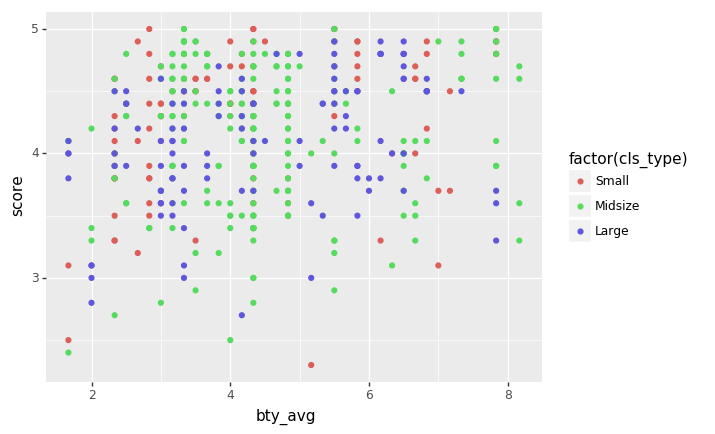

<ggplot: (-9223372029298309253)>

In [572]:
ggplot(evals, aes(x = "bty_avg", y = "score", color = "factor(cls_type)")) +  geom_point()

# Visualizing data using ggplot (plotnine in Python)

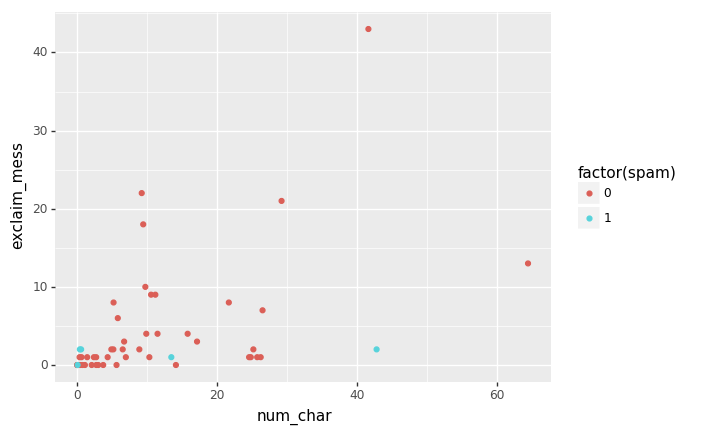

<ggplot: (7004786843)>

In [492]:
ggplot(email50, aes(x = "num_char", y = "exclaim_mess", color = "factor(spam)")) +  geom_point()

In [ ]:
# Visualizing data using ggplot (plotnine in Python)

ggplot(email50, aes(x = "num_char", y = "exclaim_mess", color = "factor(spam)")) +  geom_point()

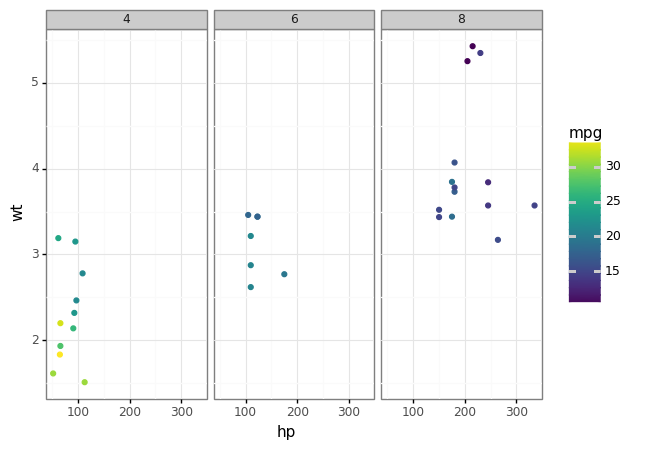

<ggplot: (7556644335)>

In [162]:
ggplot(mtcars, aes(x='hp', y='wt', color='mpg')) + geom_point() +\
facet_wrap("~cyl") + theme_bw()

### R setup (running R in Python notebook)

In [168]:
# Hide warnings if there are any
import warnings
warnings.filterwarnings('ignore')
# Load in the r magic
%load_ext rpy2.ipython
# We need ggplot2, tidyr, openintro...
%R require(ggplot2); require(tidyr); require(openintro); require(dyplr); require(gapminder)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

### Downloading and saving the data

In [611]:
%%R
library("dplyr")
data(NHANES)

In [586]:
%%R 
county_data <- county
write.csv(NHANES, "NHANES.csv")

In [576]:
%%R
load("/Users/User/Desktop/Data/DataCamp-master/Intro_to_data/disc_big.rds")
write.csv(disc_big, "")


Error in load("/Users/User/Desktop/Data/DataCamp-master/Intro_to_data/disc_big.rds") : 
  bad restore file magic number (file may be corrupted) -- no data loaded


In [584]:
%%R
disc_small <- readRDS("/Users/User/Desktop/Data/DataCamp-master/Intro_to_data/disc_small.rds")
write.csv(disc_small, "disc_small.csv")

### Examples 

In [9]:
# Make a pandas DataFrame
df = pd.DataFrame({'Alphabet': ['a', 'b', 'c', 'd','e', 'f', 'g', 'h','i'],
                   'A': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                   'B': [0, 4, 3, 6, 7, 10,11, 9, 13],
                   'C': [1, 2, 3, 1, 2, 3, 1, 2, 3]})
# Take the name of input variable df and assign it to an R variable of the same name


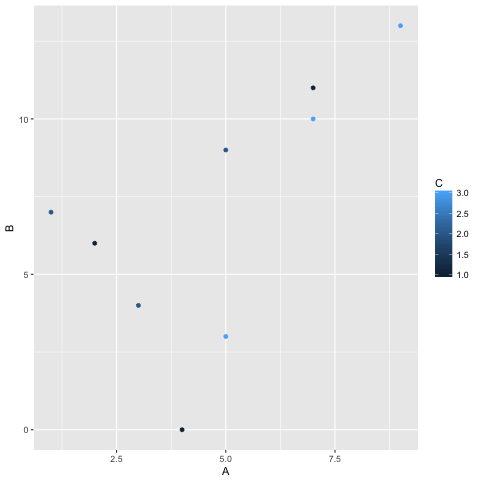

In [10]:
%%R -i df
# Plot the DataFrame df
ggplot(data=df) + geom_point(aes(x=A, y=B, color=C))

In [14]:
np.random.seed(42)
# Make a pandas DataFrame
df = pd.DataFrame(np.random.normal(0,1,size=(100, 3)), columns=list('ABC'))
df['C'] = df['C'] + 2

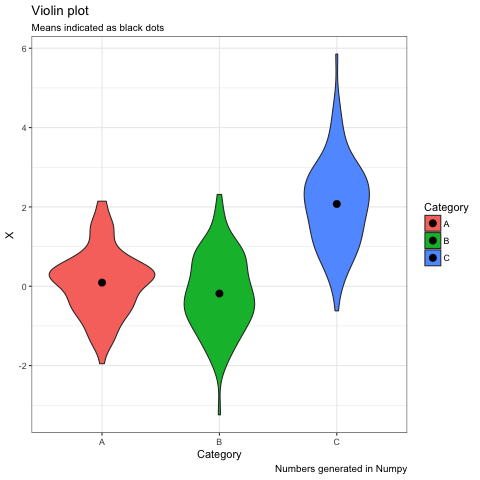

In [15]:
%%R -i df
df %>% 
  gather("Category", "X") %>%
  ggplot(aes(x = Category, y = X, fill = Category)) +
    geom_violin() +
    stat_summary(fun.y=mean, color='black', geom='point', size = 3) +
    labs(title = "Violin plot",
         subtitle = "Means indicated as black dots",
         captions = "Numbers generated in Numpy") +
    theme_bw()

In [39]:
%%R 
data(email50)
email <- email50
email
my_var <- c(1,2,3,4)
my_var

[1] 1 2 3 4


In [45]:
python_var = %Rget my_var

In [591]:
raw_data = {'Coast': ['East', 'West', 'West', 'West', 'East'], 
        'Cola': ['Coke', 'Coke', np.NaN, np.NaN, 'Coke']}
df = pd.DataFrame(raw_data, columns = ['Coast', 'Cola'])
df['count']=1
display(df)
#df.groupby(["Coast","Cola"]).count()

,Coast,Cola,count
0,East,Coke,1
1,West,Coke,1
2,West,NaN,1
3,West,NaN,1
4,East,Coke,1


In [592]:
%%R -i df
df

  Coast Cola.0 Cola.1 Cola.2 Cola.3 Cola.4 count
0  East   Coke   Coke    NaN    NaN   Coke     1
1  West   Coke   Coke    NaN    NaN   Coke     1
2  West   Coke   Coke    NaN    NaN   Coke     1
3  West   Coke   Coke    NaN    NaN   Coke     1
4  East   Coke   Coke    NaN    NaN   Coke     1


In [598]:
%%R
df <- data.frame(
   Coast = c('East', 'West', 'West', 'West', 'East') ,
   Cola = c('Coke', 'Coke', "", "", 'Coke'),
    stringsAsFactors = FALSE
)
df

  Coast Cola
1  East Coke
2  West Coke
3  West     
4  West     
5  East Coke


In [606]:
%%R
sample(df)

  Coast Cola
1  East Coke
2  West Coke
3  West     
4  West     
5  East Coke


In [612]:
%%R
df %>% mutate(df_perm = sample(df))


Error in mutate_impl(.data, dots) : 
  Column `df_perm` must be length 5 (the number of rows) or one, not 2


In [ ]:
homes %>%
  mutate(HomeOwn_perm = sample(HomeOwn)) %>%
  group_by(Gender)